In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import wfg
from testsuite.utilities import Pareto_split
from experiments.igd_refpoints.igd_utilities import *
from scipy.spatial import distance_matrix

In [2]:
try:
    with open('data/wfg1_2d_refpoints', 'rb') as infile:
        yf_2 = np.load(infile)
    yf_2_loaded = True
    print("2D data: loaded")
except FileNotFoundError:
    yf_2_loaded = False
    print("2D data: not found")

2D data: loaded


In [7]:
yf_2_loaded = False

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-13-c2847d7b526e>:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


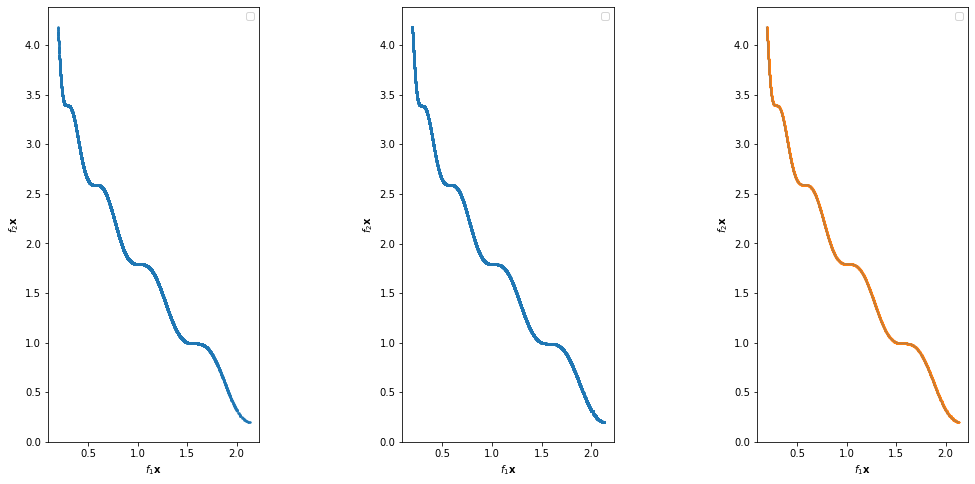

In [13]:
if not yf_2_loaded:
    func = wfg.WFG1
    n_obj = 2
    l = 3
    k = 3
    n_dim = k+l
    
    M = n_obj
    N = 20000
    y = np.zeros((N, n_obj))
    x = np.zeros((N, n_dim))
    for n in range(N):
        z = wfg.random_soln(k, l, func.__name__)
        y[n,:] = func(z, k, M)
        x[n,:] = z
    
#     y = np.vstack((y[y[:,0]<0.2], y[(y[:,0]>0.2)*(y[:,0]<1.74)][::100], y[y[:,0]>1.74]))
#     y = np.vstack((y[y[:,0]<0.2], y[(y[:,0]>0.2)*(y[:,0]<1.34)][::5], y[y[:,0]>1.34]))
#     y = np.vstack((y[y[:,0]<0.01], y[(y[:,0]>0.01)*(y[:,0]<0.25)][::10], y[y[:,0]>0.25]))
#     y = np.vstack((y[y[:,0]<0.005], y[(y[:,0]>0.005)*(y[:,0]<0.19)][::10], y[y[:,0]>0.19]))
    
    ya = attainment_sample(y, 10000)
    
#     D = distance_matrix(y, ya)
    
#     min_D0 = D.min(axis=0)
#     min_D1 = D.min(axis=1)
    
#     thresh_plot_0 = [sum(min_D0<i) for i in np.linspace(0.01, 0.5, 200)]
#     thresh_plot_1 = [sum(min_D1<i) for i in np.linspace(0.01, 0.5, 200)]
    
#     thresh=0.01
    
#     fig0 = plt.figure(figsize=[8, 8])
#     fig0_ax = fig0.gca()
#     fig0_ax.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(min_D0), label="Pareto surface points")
#     fig0_ax.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(min_D1), label="Attainment surface points")
#     fig0_ax.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
#     fig0_ax.set_xlabel("Threshhold distance")
#     fig0_ax.set_ylabel("n below threshold/n totaal")
#     fig0_ax.set_xlim([0, 0.5])
#     fig0_ax.set_ylim([0, 1.1])
#     fig0_ax.legend()
#     fig0.show()
    
#     yf_2 = ya[min_D0<thresh]
    yf_2 = ya
    
    fig = plt.figure(figsize=[18, 8])
    ax0 = fig.add_subplot(131)
    ax1 = fig.add_subplot(132)
    ax2 = fig.add_subplot(133)
    
    ax_format(ax0, [2, 4])
    ax_format(ax1, [2, 4])
    ax_format(ax2, [2, 4])
    
    
    ax0.scatter(*y.T, s=2, label="")
    
    ax1.scatter(*ya.T, s=2, label="")
    
    ax2.plot(*y[np.argsort(y[:,0])].T, c="C0", alpha=0.3, label="Pareto surface")
    ax2.scatter(*yf_2.T, s=2, c="C1", marker=".", label="attainment front samples")
    
    ax0.set_xlabel(r"$f_1\mathbf{x}$")
    ax0.set_ylabel(r"$f_2\mathbf{x}$")
    ax0.set_aspect("equal")
    fig.show()

(1.8, 2.0)

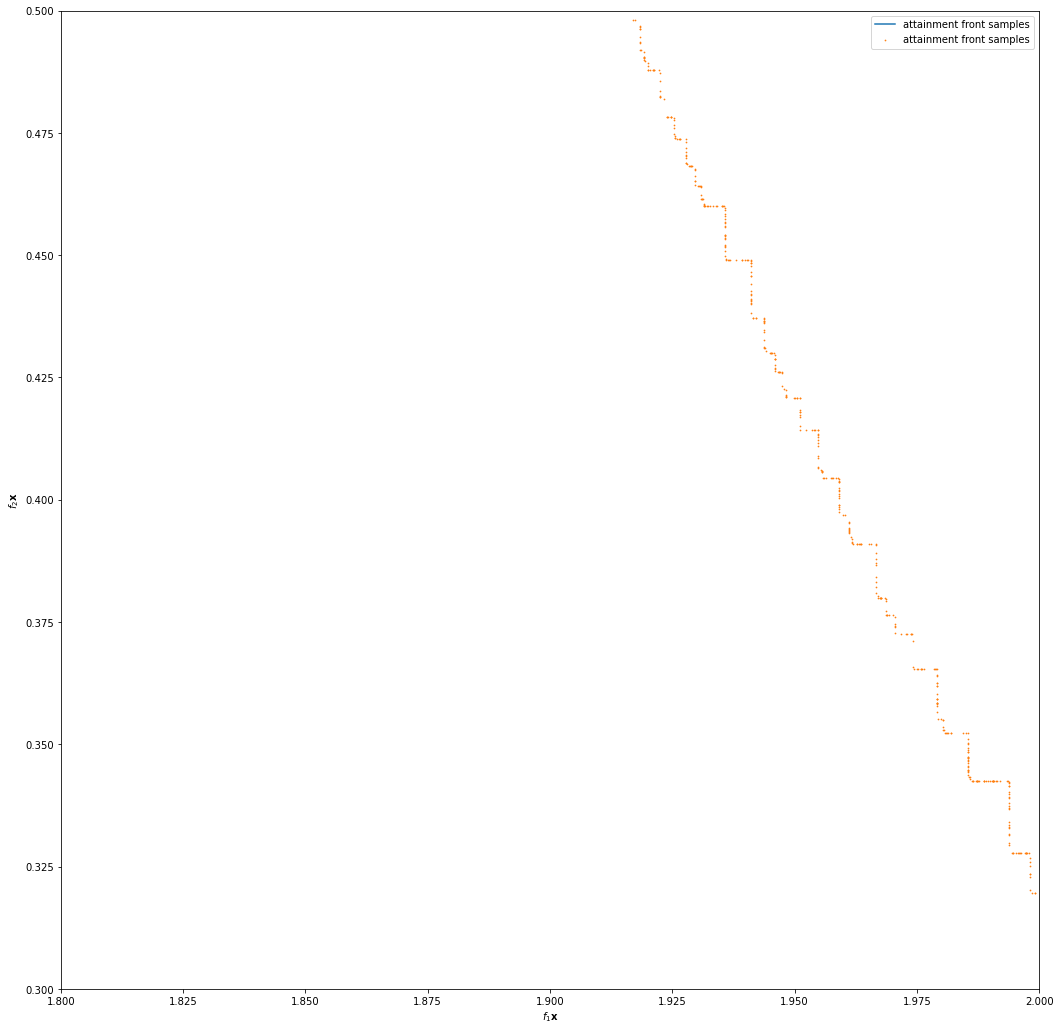

In [10]:
fig = plt.figure(figsize=[18, 18])
ax = fig.gca()
# ax.plot(*y[np.argsort(y[:,0])].T, c="C0", alpha=0.3, label="Pareto surface")
ax.plot(*yf_2_smooth[np.argsort(yf_2_smooth[:,0])].T, c="C0", label="attainment front samples")
ax.scatter(*yf_2.T, s=2, c="C1", marker=".", label="attainment front samples")
ax.set_xlabel(r"$f_1\mathbf{x}$")
ax.set_ylabel(r"$f_2\mathbf{x}$")
ax.set_aspect('equal')
ax.legend()
ax.set_ylim([.3, .5])
ax.set_xlim([1.8, 2.00])

(2.4, 2.6)

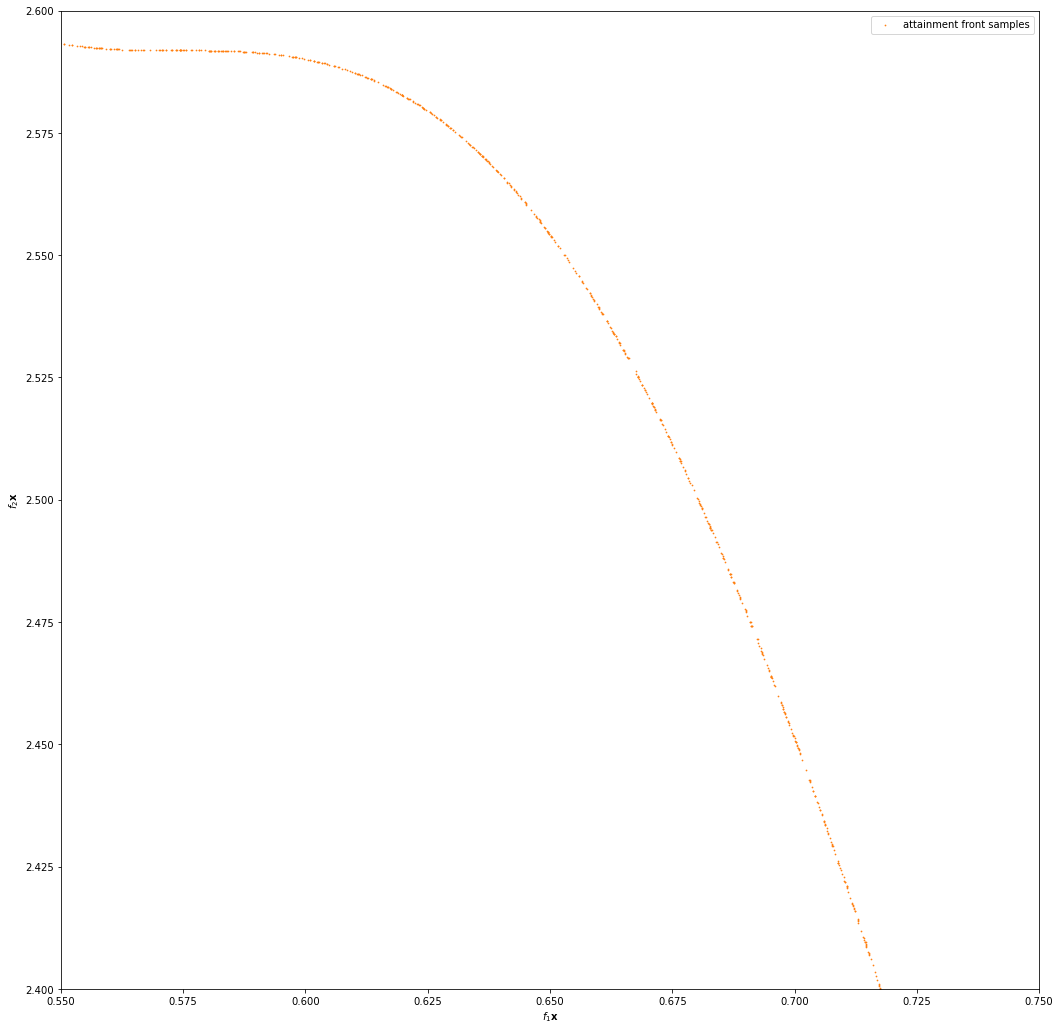

In [11]:
fig = plt.figure(figsize=[18, 18])
ax = fig.gca()
# ax.plot(*y[np.argsort(y[:,0])].T, c="C0", alpha=0.3, label="Pareto surface")
ax.scatter(*yf_2.T, s=2, c="C1", marker=".", label="attainment front samples")
ax.set_xlabel(r"$f_1\mathbf{x}$")
ax.set_ylabel(r"$f_2\mathbf{x}$")
ax.set_aspect('equal')
ax.legend()
ax.set_xlim([.55, .75])
ax.set_ylim([2.4, 2.6])

In [12]:
if yf_2_loaded is not True:
    with open('data/wfg1_2d_refpoints', 'wb') as outfile:
        np.save(outfile, yf_2)
    print("Data saved")

Data saved


In [15]:
try:
    with open('data/wfg1_3d_refpoints', 'rb') as infile:
        yf_3 = np.load(infile)
    yf_3_loaded = True
    print("3D data: loaded")
except FileNotFoundError:
    yf_3_loaded = False
    print("3D data: not found")

3D data: loaded


In [17]:
yf_3_loaded = False

<ipython-input-18-85a6ea127c09>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig0.show()
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[2, 4, 6]
3d
[2, 4, 6]
3d


TypeError: multiple values for argument 's'

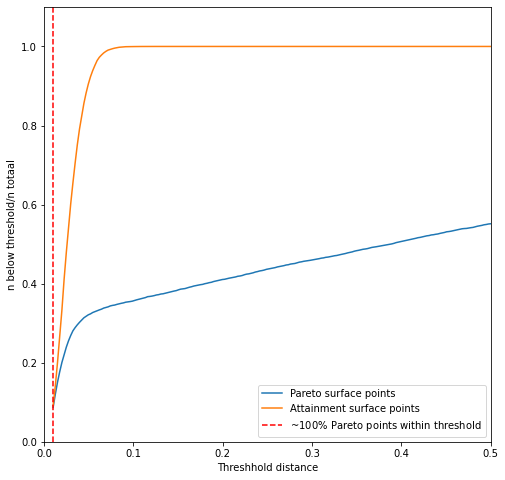

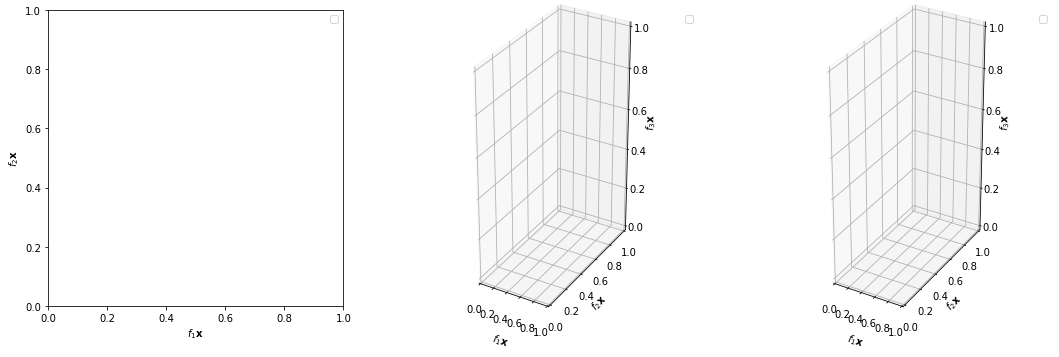

In [18]:
if not yf_3_loaded:
    func = wfg.WFG1
    n_obj = 3
    l = 3
    k = 3
    n_dim = k+l
    
    M = n_obj
    N = 20000
    y = np.zeros((N, n_obj))
    x = np.zeros((N, n_dim))
    for n in range(N):
        z = wfg.random_soln(k, l, func.__name__)
        y[n,:] = func(z, k, M)
        x[n,:] = z
    
#     y = np.vstack((y[y[:,0]<0.2], y[(y[:,0]>0.2)*(y[:,0]<1.74)][::100], y[y[:,0]>1.74]))
#     y = np.vstack((y[y[:,0]<0.2], y[(y[:,0]>0.2)*(y[:,0]<1.34)][::5], y[y[:,0]>1.34]))
#     y = np.vstack((y[y[:,0]<0.01], y[(y[:,0]>0.01)*(y[:,0]<0.25)][::10], y[y[:,0]>0.25]))
#     y = np.vstack((y[y[:,0]<0.005], y[(y[:,0]>0.005)*(y[:,0]<0.19)][::10], y[y[:,0]>0.19]))
    
    ya = attainment_sample(y, 10000)
    
    D = distance_matrix(y, ya)
    
    min_D0 = D.min(axis=0)
    min_D1 = D.min(axis=1)
    
    thresh_plot_0 = [sum(min_D0<i) for i in np.linspace(0.01, 0.5, 200)]
    thresh_plot_1 = [sum(min_D1<i) for i in np.linspace(0.01, 0.5, 200)]
    
    thresh=0.01
    
    fig0 = plt.figure(figsize=[8, 8])
    fig0_ax = fig0.gca()
    fig0_ax.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(min_D0), label="Pareto surface points")
    fig0_ax.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(min_D1), label="Attainment surface points")
    fig0_ax.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
    fig0_ax.set_xlabel("Threshhold distance")
    fig0_ax.set_ylabel("n below threshold/n totaal")
    fig0_ax.set_xlim([0, 0.5])
    fig0_ax.set_ylim([0, 1.1])
    fig0_ax.legend()
    fig0.show()
    
    yf_2 = ya[min_D0<thresh]
    yf_2 = ya
    
    fig = plt.figure(figsize=[18, 8])
    ax0 = fig.add_subplot(131)
    ax1 = fig.add_subplot(132, projection="3d")
    ax2 = fig.add_subplot(133, projection="3d")
    
    ax_format(ax0, [2, 4, 6])
    ax_format(ax1, [2, 4, 6])
    ax_format(ax2, [2, 4, 6])
    
    
    ax0.scatter(*y.T, s=2, label="")
    
    ax1.scatter(*ya.T, s=2, label="")
    
    ax2.plot(*y[np.argsort(y[:,0])].T, c="C0", alpha=0.3, label="Pareto surface")
    ax2.scatter(*yf_2.T, s=20, c="C1", marker=".", label="attainment front samples")
    
    ax0.set_xlabel(r"$f_1\mathbf{x}$")
    ax0.set_ylabel(r"$f_2\mathbf{x}$")
    ax0.set_aspect("equal")
    fig.show()

No handles with labels found to put in legend.


[2.0, 4.0, 6.0]
3d


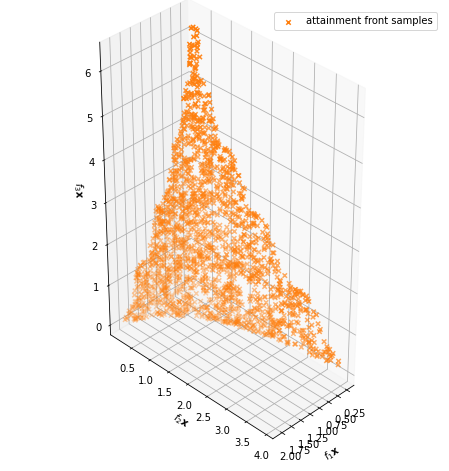

In [72]:
a, b, c = np.round(yf_3.max(axis=0))
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection="3d")
ax_format(ax, [a, b, c],  vp=[35, 45])
# ax.plot(*y[np.argsort(y[:,0])].T, c="C0", alpha=0.3, label="Pareto surface")
ax.scatter(*yf_3.T, s=20, c="C1", marker="x", label="attainment front samples")

ax.legend()

In [24]:
try:
    with open('data/wfg1_4d_refpoints', 'rb') as infile:
        yf_4 = np.load(infile)
    yf_4_loaded = True
    print("4D data: loaded")
except FileNotFoundError:
    yf_4_loaded = False
    print("4D data: not found")

4D data: loaded


In [30]:
func = wfg.WFG1
n_obj = 4
l = 3
k = 3
n_dim = k+l

M = n_obj
N = 2000
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z

In [31]:
pi, di = Pareto_split(y, return_indices=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[1.9, 3.9, 6.1]
3d
[3.9, 6.1, 8.1]
3d
[1.9, 6.1, 8.1]
3d
[1.9, 3.9, 6.1]
3d
[3.9, 6.1, 8.1]
3d
[1.9, 6.1, 8.1]
3d


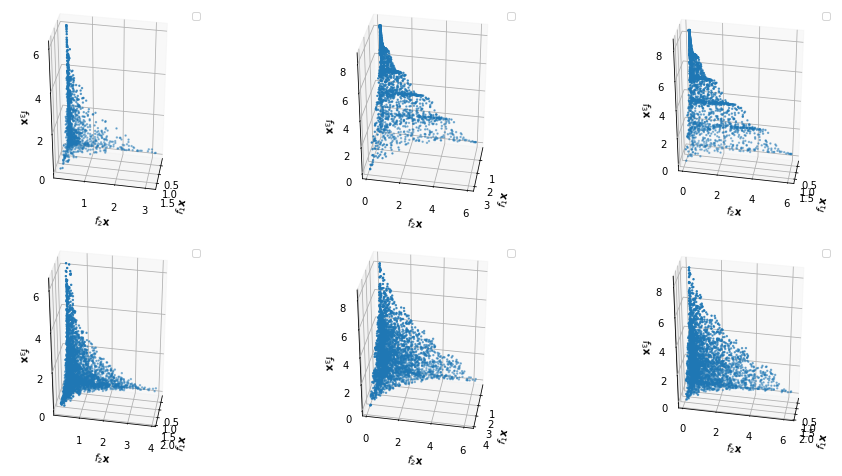

In [32]:
a, b, c, d = np.round(yf_4.max(axis=0), 1)
fig = plt.figure(figsize=[16, 8])
ax0 = fig.add_subplot(2,3,1, projection="3d")
ax1 = fig.add_subplot(2,3,2, projection="3d")
ax2 = fig.add_subplot(2,3,3, projection="3d")
ax3 = fig.add_subplot(2,3,4, projection="3d")
ax4 = fig.add_subplot(2,3,5, projection="3d")
ax5 = fig.add_subplot(2,3,6, projection="3d")

ax_format(ax0, axes=[a, b, c], vp=[35, 10]);
ax_format(ax1, axes=[b, c, d], vp=[35, 10]);
ax_format(ax2, axes=[a, c, d], vp=[35, 10]);
ax_format(ax3, axes=[a, b, c], vp=[35, 10]);
ax_format(ax4, axes=[b, c, d], vp=[35, 10]);
ax_format(ax5, axes=[a, c, d], vp=[35, 10]);

ax0.scatter(*y[pi][:, :3].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax1.scatter(*y[pi][:,1:4].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax2.scatter(*y[pi][:,[0,2,3]].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")

ax3.scatter(*yf_4[:, :3].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax4.scatter(*yf_4[:,1:4].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax5.scatter(*yf_4[:,[0,2,3]].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")

In [33]:
ypi, ydi = Pareto_split(yf_4, return_indices=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[1.9, 3.9, 6.1]
3d
[3.9, 6.1, 8.1]
3d
[1.9, 6.1, 8.1]
3d


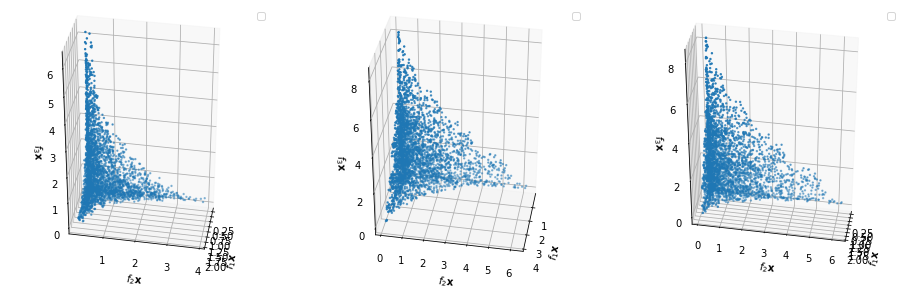

In [35]:
a, b, c, d = np.round(yf_4.max(axis=0), 1)
fig = plt.figure(figsize=[16, 8])
ax0 = fig.add_subplot(1,3,1, projection="3d")
ax1 = fig.add_subplot(1,3,2, projection="3d")
ax2 = fig.add_subplot(1,3,3, projection="3d")

ax_format(ax0, axes=[a, b, c], vp=[35, 10]);
ax_format(ax1, axes=[b, c, d], vp=[35, 10]);
ax_format(ax2, axes=[a, c, d], vp=[35, 10]);

ax0.scatter(*yf_4[ypi][:, :3].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax1.scatter(*yf_4[ypi][:,1:4].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax2.scatter(*yf_4[ypi][:,[0,2,3]].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")

In [36]:
import pymoo

In [37]:
from pymoo import  

<module 'pymoo.version' from '/home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/pymoo/version.py'>

In [57]:
# Faster than is_pareto_efficient_simple, but less readable.
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

In [58]:
import time
%matplotlib qt

In [73]:
x = np.random.randn(1000, 3)
p = is_pareto_efficient(x)
p = np.where(p==True)[0]
p2 = Pareto_split(x, return_indices=True)[0]

In [74]:
tic = time.time()
p = is_pareto_efficient(x)
print(time.time()-tic)

0.005013465881347656


In [75]:
tic = time.time()
p2 = Pareto_split(x, return_indices=True)[0]
print(time.time()-tic)

13.876394987106323


In [60]:
fig = plt.figure(figsize=[13, 6])
ax0 = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122, projection="3d")

ax0.scatter(*x.T)
ax1.scatter(*x[np.invert(p)].T, c="C0")
ax1.scatter(*x[p].T, c="C3")

In [70]:
np.all(p==p2)

True